
## **CAPSTONE PROJECT: Statistical Characteristics of Markets in emerging economies with a particular reference to the Indian, Chinese and South African markets**

#**Install required modules for the analysis**

In [ ]:
pip install python_settings

In [ ]:
#Install module config
!pip install config

In [ ]:
#pip install pingouin
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=afa3a82e8338d7fc86de464f0a7001f24b0cefd5fa214f291d8ba47c8d98726d
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
#Install module arch
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 14.9 MB/s eta 0:00:00


In [ ]:
!pip install Dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 25.7 MB/s eta 0:00:00


#**Importing the required libraries**

In [ ]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.tsa.regime_switching.markov_autoregression import MarkovAutoregression
from arch import arch_model
from python_settings import settings
from statsmodels.graphics.tsaplots import acf, pacf
from statsmodels.tsa.stattools import adfuller
from scipy.stats import shapiro
from plotly.subplots import make_subplots
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import yfinance as yfin
yfin.pdr_override()
import statsmodels.api as sm
from scipy.stats import norm, kurtosis

#**Extracting the data**

In [ ]:
#We extracted data from Yahoo Finance.
start = datetime.date(2013, 3, 1)
end = datetime.date(2023, 3, 1)
stocks = web.DataReader(["ABG.JO", "FSR.JO", "SBK.JO", "LHC.JO", "IMP.JO",
                         "NFTY", "^NSEI", "ICICIBANK.NS",
                         "BHARTIARTL.NS", "TCOM", "TCEHY", "INFY",
                         "VIPS", "BIDU", "NTES"],
                        start, end)["Adj Close"]

In [ ]:
#We can have a glimpse of the returns
stocks.head().round(4)

In [ ]:
#checking for missing values
stocks.isna().sum()

In [ ]:
#We replaced missing values by using the values before them
stocks = stocks.fillna(method ='bfill')
stocks.isna().sum()

In [ ]:
# We find the daily stock returns for each stock and store it as a new data frame called stock_returns
stock_returns = stocks.pct_change()
stock_returns = stock_returns.iloc[1: , :]

In [ ]:
stock_returns.head()

In [ ]:
# We find the log daily stock returns for each stock and store it as a new data frame called stock_log_returns
stock_log_returns = np.log(stocks / stocks.shift(1))
stock_log_returns = stock_returns.iloc[1: , :]

In [ ]:
stock_log_returns.head()

#**Normality Test**

Normality of daily returns

In [ ]:
for column in stock_returns.columns:
    stat, p_value = shapiro(stock_returns[column])
    print(f'Stock: {column}')
    print(f'Shapiro-Wilk Statistic: {stat}')
    print(f'p-value: {p_value}')
    print(f'Is Normal: {p_value > 0.05}')
    print('\n')

In [ ]:
fig_dims = (15, 6)
plt.style.use('ggplot')
stock_returns.plot(figsize=fig_dims)
# Add axes
plt.xlabel("Date")
plt.ylabel("Daily returns")
# Add title
plt.title("Distribution of Daily returns from 2013-2023")
# Add legend
plt.legend();

Normality of daily log returns


In [ ]:
for column in stock_log_returns.columns:
    stat, p_value = shapiro(stock_log_returns[column])
    print(f'Stock: {column}')
    print(f'Shapiro-Wilk Statistic: {stat}')
    print(f'p-value: {p_value}')
    print(f'Is Normal: {p_value > 0.05}')
    print('\n')

In [ ]:
fig_dims = (15, 6)
plt.style.use('ggplot')
stock_log_returns.plot(figsize=fig_dims)
# Add axes
plt.xlabel("Date")
plt.ylabel("Daily returns")
# Add title
plt.title("Distribution of Daily log returns from 2013-2023")
# Add legend
plt.legend();

Our results show that our data sets come from non-gaussian distributions. The
returns are not normally distributed. This proves one of the stylized facts on returns which states that stock returns are not normally distributed. P value is less than the threshold, alpha of 0.05 then there is enough evidence that the data set is not coming from a normal distribution.  


Kurtosis test

In [ ]:
#We checked the kurtosis test our data to ascertain the tailedness of returns.

kurtosis(stock_log_returns[column])

#**Correlation Matrix**

In [ ]:
# Calculate the correlation matrix
correlation_matrix = stock_returns.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Stationarity Tests**

In [ ]:
# Loop through each column and perform ADF test for stationarity
for column in stock_returns.columns:
    result = adfuller(stock_returns[column])
    print(f'Column: {column}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    print(f'Is Stationary: {result[1] <= 0.05}')
    print('\n')

Our results shows that the data Stationary.

Stationary time series allow for more reliable statistical inference, including hypothesis testing, confidence intervals, and parameter estimation.

#**Grouping the data by country**

Glossary
* Stock daily returns India = SR_India
* Stock daily returns South Atrica = SR_SA
* Stock daily returns China = SR_China
* Stock log daily returns India = SR_log_India
* Stock log daily returns South Africa = SR_log_SA
* Stock log daily returns China = SR_log_China

In [ ]:
India = ['BHARTIARTL.NS','ICICIBANK.NS','^NSEI','NFTY','INFY']
South_Africa = ['ABG.JO','FSR.JO','SBK.JO','IMP.JO','LHC.JO']
China = ['VIPS','BIDU','NTES','TCOM','TCEHY']
SR_India = stock_returns[India]
SR_SA = stock_returns[South_Africa]
SR_China = stock_returns[China]
SR_log_India = stock_log_returns[India]
SR_log_SA = stock_log_returns[South_Africa]
SR_log_China = stock_log_returns[China]

#**Visualization of daily returns and log daily returns by contry**

Visualization of daily and log daily returns of Indian stocks

In [ ]:
# Create subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=["Daily Returns", "Log Returns"])

# Add traces for each stock's daily returns
for column in SR_India.columns:
    trace = go.Scatter(x=SR_India.index, y=SR_India[column], mode='lines', name=column)
    fig.add_trace(trace, row=1, col=1)

# Add traces for each stock's log returns
for column in SR_log_India.columns:
    trace = go.Scatter(x=SR_log_India.index, y=SR_log_India[column], mode='lines', name=column)
    fig.add_trace(trace, row=2, col=1)

# Update layout
fig.update_layout(title='Daily and Log Returns for Indian Stocks', height=800, showlegend=True)

# Show the plot
fig.show()

Visualization of daily and log daily returns of South African stocks

In [ ]:
# Create subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=["Daily Returns", "Log Returns"])

# Add traces for each stock's daily returns
for column in SR_SA.columns:
    trace = go.Scatter(x=SR_SA.index, y=SR_SA[column], mode='lines', name=column)
    fig.add_trace(trace, row=1, col=1)

# Add traces for each stock's log returns
for column in SR_log_SA.columns:
    trace = go.Scatter(x=SR_log_SA.index, y=SR_log_SA[column], mode='lines', name=column)
    fig.add_trace(trace, row=2, col=1)

# Update layout
fig.update_layout(title='Daily and Log Returns for South African Stocks', height=800, showlegend=True)

# Show the plot
fig.show()

Visualization of daily and log daily returns of Chinese stocks

In [ ]:
# Create subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=["Daily Returns", "Log Returns"])

# Add traces for each stock's daily returns
for column in SR_China.columns:
    trace = go.Scatter(x=SR_China.index, y=SR_China[column], mode='lines', name=column)
    fig.add_trace(trace, row=1, col=1)

# Add traces for each stock's log returns
for column in SR_log_China.columns:
    trace = go.Scatter(x=SR_log_China.index, y=SR_log_China[column], mode='lines', name=column)
    fig.add_trace(trace, row=2, col=1)

# Update layout
fig.update_layout(title='Daily and Log Returns for Chinese Stocks', height=800, showlegend=True)

# Show the plot
fig.show()

#**Interactive Visulization of Daily returns**


Indian Stocks

In [ ]:
# Initialize Dash app
app = Dash(__name__)

# Define app layout
app.layout = html.Div([
    dcc.Dropdown(
        id='column-dropdown',
        options=[{'label': col, 'value': col} for col in SR_India.columns[0:5]],
        value=['NFTY'], # Default selected columns
        multi=True
    ),
    dcc.Graph(id='multi-column-graph'),
])

# Define callback to update graph
@app.callback(
    Output('multi-column-graph', 'figure'),
    Input('column-dropdown', 'value')
)
def update_graph(selected_columns):
    SR_India['index']=SR_India.index
    x_column = SR_India['index']

    traces = []
    for column in selected_columns:
        trace = {
            'x': x_column,
            'y': SR_India[column],
            'name': column,
            'mode': 'lines+markers',
        }
        traces.append(trace)

    layout = {
        'title': 'Daily Returns for Indian Stocks',
        'xaxis': {'title': x_column},
        'yaxis': {'title': 'Values'},
    }

    return {'data': traces, 'layout': layout}

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


Chinese Stocks

In [ ]:
# Initialize Dash app
app = Dash(__name__)

# Define app layout
app.layout = html.Div([
    dcc.Dropdown(
        id='column-dropdown',
        options=[{'label': col, 'value': col} for col in SR_China.columns[0:5]],
        value=['VIPS'], # Default selected columns
        multi=True
    ),
    dcc.Graph(id='multi-column-graph'),
])

# Define callback to update graph
@app.callback(
    Output('multi-column-graph', 'figure'),
    Input('column-dropdown', 'value')
)
def update_graph(selected_columns):
    SR_China['index']=SR_China.index
    x_column = SR_China['index']

    traces = []
    for column in selected_columns:
        trace = {
            'x': x_column,
            'y': SR_China[column],
            'name': column,
            'mode': 'lines+markers',
        }
        traces.append(trace)

    layout = {
        'title': 'Daily Returns for Chinese Stocks',
        'xaxis': {'title': x_column},
        'yaxis': {'title': 'Values'},
    }

    return {'data': traces, 'layout': layout}

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


South African Stocks

In [ ]:
# Initialize Dash app
app = Dash(__name__)

# Define app layout
app.layout = html.Div([
    dcc.Dropdown(
        id='column-dropdown',
        options=[{'label': col, 'value': col} for col in SR_SA.columns[0:5]],
        value=['ABG.JO'], # Default selected columns
        multi=True
    ),
    dcc.Graph(id='multi-column-graph'),
])

# Define callback to update graph
@app.callback(
    Output('multi-column-graph', 'figure'),
    Input('column-dropdown', 'value')
)
def update_graph(selected_columns):
    SR_SA['index']=SR_SA.index
    x_column = SR_SA['index']

    traces = []
    for column in selected_columns:
        trace = {
            'x': x_column,
            'y': SR_SA[column],
            'name': column,
            'mode': 'lines+markers',
        }
        traces.append(trace)

    layout = {
        'title': 'Daily Returns for Chinese Stocks',
        'xaxis': {'title': x_column},
        'yaxis': {'title': 'Values'},
    }

    return {'data': traces, 'layout': layout}

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


#**ACF & PACF**

In [ ]:
# Create a Plotly figure
fig = go.Figure()

# Plot ACF for each column on the same graph
for column in stock_returns.columns:
    acf_values = acf(stock_returns[column])
    lag_values = np.arange(len(acf_values))
    fig.add_trace(go.Scatter(x=lag_values, y=acf_values, mode='lines', name=f'{column}'))

# Update layout
fig.update_layout(
    title="ACF Plots",
    xaxis_title="Lags",
    yaxis_title="ACF",
)

# Show the plot
fig.show()

In [ ]:
# Create a Plotly figure
fig = go.Figure()

# Calculate and plot PACF for each column on the same graph
for column in stock_returns.columns:
    pacf_values = pacf(stock_returns[column])
    lag_values = np.arange(len(pacf_values))
    fig.add_trace(go.Scatter(x=lag_values, y=pacf_values, mode='lines', name=f'{column}'))

# Update layout
fig.update_layout(
    title="PACF Plots",
    xaxis_title="Lags",
    yaxis_title="PACF",
)

# Show the plot
fig.show()

# **Garch Model**

**Indian Stocks**

In [ ]:
# Fit GARCH(1, 1) model for Indian stock
models = {}
for column in SR_India.columns:
    model = arch_model(SR_India[column], vol='Garch', p=1, q=1)
    models[column] = model.fit()

# Display model summaries and plot volatility
for column, model in models.items():
    print(f"Model summary for {column}:")
    print(model.summary())
    print(sm.stats.acorr_ljungbox(model.resid, lags=[35], return_df=True))
    model.plot()
    plt.title(f"Volatility for {column}")
    plt.show()
#50 day rolling volatility
rolling_50d_volatility = SR_India[column].rolling(window=50).std().dropna()
#50 day plot
fig, ax = plt.subplots(figsize=(15, 6))

# Plot daily volatility
SR_India[column].plot(ax=ax, label="daily volatility")

# Plot rolling_50d_volatility
rolling_50d_volatility.plot(ax=ax, label="50d rolling volatility", linewidth=3)

# Add x-axis label
plt.xlabel("Date")
#Add title
plt.title("50d rolling volatility")
plt.ylabel("Volatility")

# Add legend
plt.legend();


**South African Stocks**

In [ ]:
# Fit GARCH(1, 1) model for South Africa stock
models = {}
for column in SR_SA.columns:
    model = arch_model(SR_SA[column], vol='Garch', p=1, q=1)
    models[column] = model.fit()

# Display model summaries and plot volatility
for column, model in models.items():
    print(f"Model summary for {column}:")
    print(model.summary())
    print(sm.stats.acorr_ljungbox(model.resid, lags=[20], return_df=True))
    model.plot()
    plt.title(f"Volatility for {column}")
    plt.show()

#Leveraged effect
#50 day rolling volatility
rolling_50d_volatility = SR_SA[column].rolling(window=50).std().dropna()
#50 day plot
fig, ax = plt.subplots(figsize=(15, 6))

# Plot daily volatility
SR_SA[column].plot(ax=ax, label="daily volatility")

# Plot rolling_50d_volatility
rolling_50d_volatility.plot(ax=ax, label="50d rolling volatility", linewidth=3)

# Add x-axis label
plt.xlabel("Date")
#Add title
plt.title("50d rolling volatility")
plt.ylabel("Volatility")

# Add legend
plt.legend();

**Chinese Stocks**

Iteration:      1,   Func. Count:      6,   Neg. LLF: 16259.163221642784
Iteration:      2,   Func. Count:     15,   Neg. LLF: 4988.493416124027
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1733.3992640588654
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1222.5099078368967
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1161.5372337193317
Iteration:      6,   Func. Count:     42,   Neg. LLF: 1161.6594901357262
Iteration:      7,   Func. Count:     48,   Neg. LLF: 1161.388859971397
Iteration:      8,   Func. Count:     53,   Neg. LLF: 1161.3750641653426
Iteration:      9,   Func. Count:     58,   Neg. LLF: 1161.3748845016198
Iteration:     10,   Func. Count:     63,   Neg. LLF: 1161.3748306917987
Iteration:     11,   Func. Count:     67,   Neg. LLF: 1161.3748306916405
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1161.3748306917987
            Iterations: 11
            Function evaluations: 67
            Gradient evalu

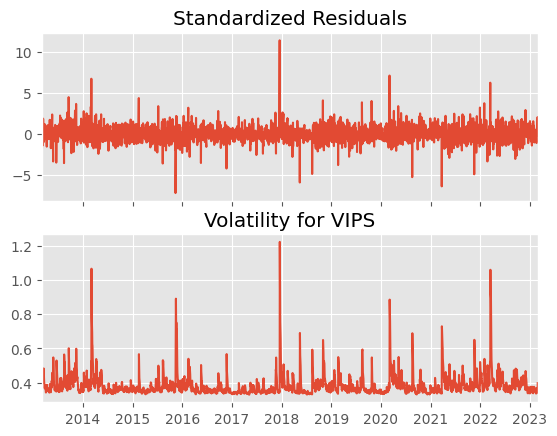

Model summary for BIDU:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   BIDU   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6101.97
Distribution:                  Normal   AIC:                           12211.9
Method:            Maximum Likelihood   BIC:                           12235.4
                                        No. Observations:                 2600
Date:                Mon, Aug 21 2023   Df Residuals:                     2599
Time:                        17:00:09   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0692  4.588e-02     

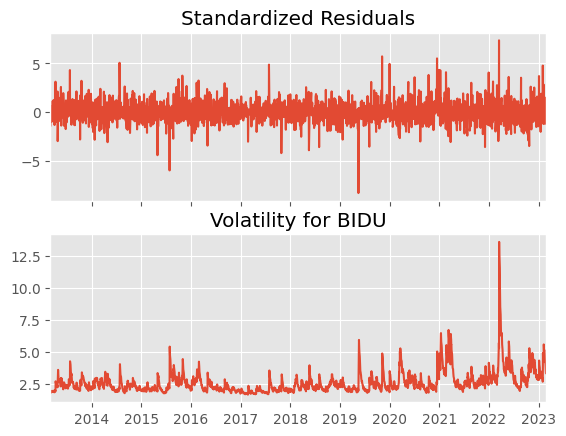

Model summary for NTES:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   NTES   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6025.81
Distribution:                  Normal   AIC:                           12059.6
Method:            Maximum Likelihood   BIC:                           12083.1
                                        No. Observations:                 2600
Date:                Mon, Aug 21 2023   Df Residuals:                     2599
Time:                        17:00:10   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1269  4.618e-02      2.

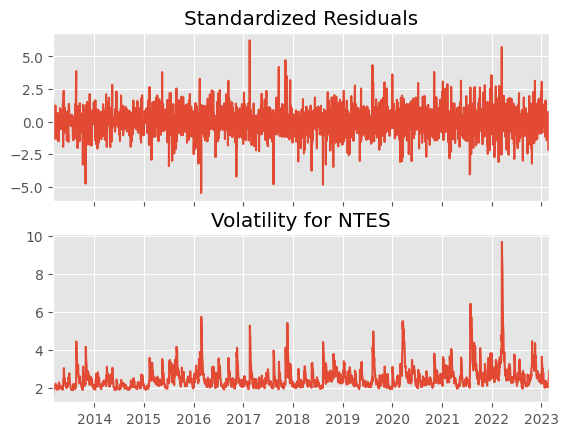

Model summary for TCOM:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   TCOM   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6399.09
Distribution:                  Normal   AIC:                           12806.2
Method:            Maximum Likelihood   BIC:                           12829.6
                                        No. Observations:                 2600
Date:                Mon, Aug 21 2023   Df Residuals:                     2599
Time:                        17:00:10   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0677  5.747e-02     

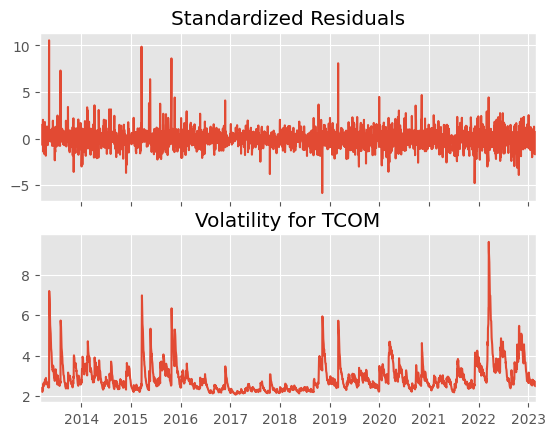

Model summary for TCEHY:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  TCEHY   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5685.56
Distribution:                  Normal   AIC:                           11379.1
Method:            Maximum Likelihood   BIC:                           11402.6
                                        No. Observations:                 2600
Date:                Mon, Aug 21 2023   Df Residuals:                     2599
Time:                        17:00:10   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1502  3.862e-02      3

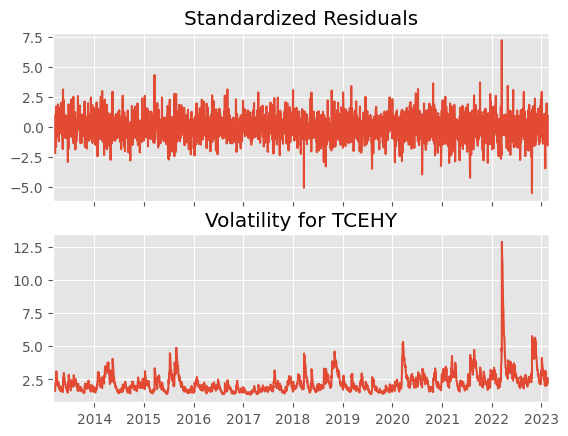

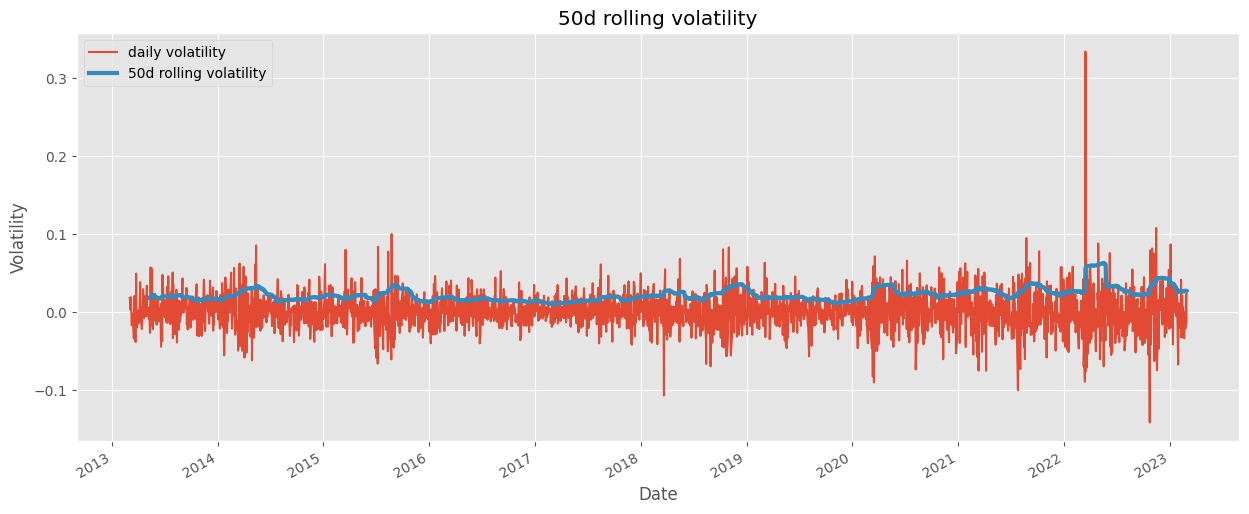

In [ ]:
# Fit GARCH(1, 1) model for Chinese stock
models = {}
for column in SR_China.columns:
    model = arch_model(SR_China[column], vol='Garch', p=1, q=1, rescale=True)
    models[column] = model.fit()

# Display model summaries and plot volatility
for column, model in models.items():
    print(f"Model summary for {column}:")
    print(model.summary())
    print(sm.stats.acorr_ljungbox(model.resid, lags=[20], return_df=True))
    model.plot()
    plt.title(f"Volatility for {column}")
    plt.show()

#Leveraged Effect
#50 day rolling volatility
rolling_50d_volatility = SR_China[column].rolling(window=50).std().dropna()
#50 day plot
fig, ax = plt.subplots(figsize=(15, 6))

# Plot daily volatility
SR_China[column].plot(ax=ax, label="daily volatility")

# Plot rolling_50d_volatility
rolling_50d_volatility.plot(ax=ax, label="50d rolling volatility", linewidth=3)

# Add x-axis label
plt.xlabel("Date")
#Add title
plt.title("50d rolling volatility")
plt.ylabel("Volatility")

# Add legend
plt.legend();

# **Markov switching autoregressive (MS-AR) model**

We also checked regime changes of stocks from 2013 to 2023. We implemented a Markov switching autoregressive (MS-AR) model. We then plotted the graphs to show the probabilities of high variance and probabilities of low variance.

**Indian Stocks**

Model summary for BHARTIARTL.NS:
                        Markov Switching Model Results                        
Dep. Variable:          BHARTIARTL.NS   No. Observations:                 2600
Model:               MarkovRegression   Log Likelihood                6727.903
Date:                Mon, 21 Aug 2023   AIC                         -13447.805
Time:                        17:00:23   BIC                         -13424.352
Sample:                             0   HQIC                        -13439.308
                               - 2600                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   1.43e-05     11.096      0.000       0.000       0.000
                   

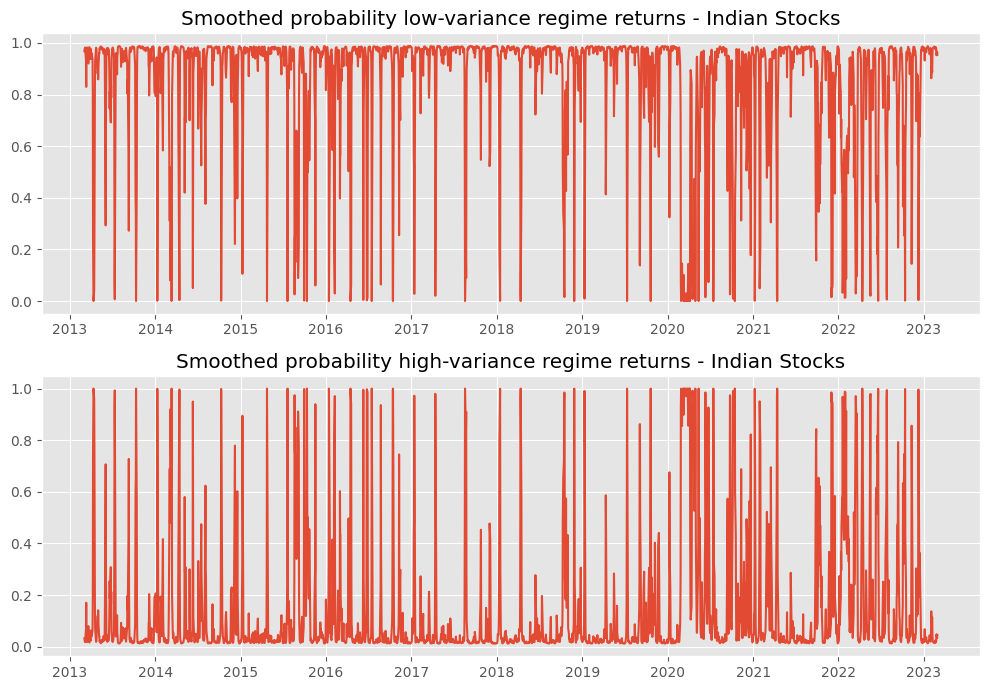

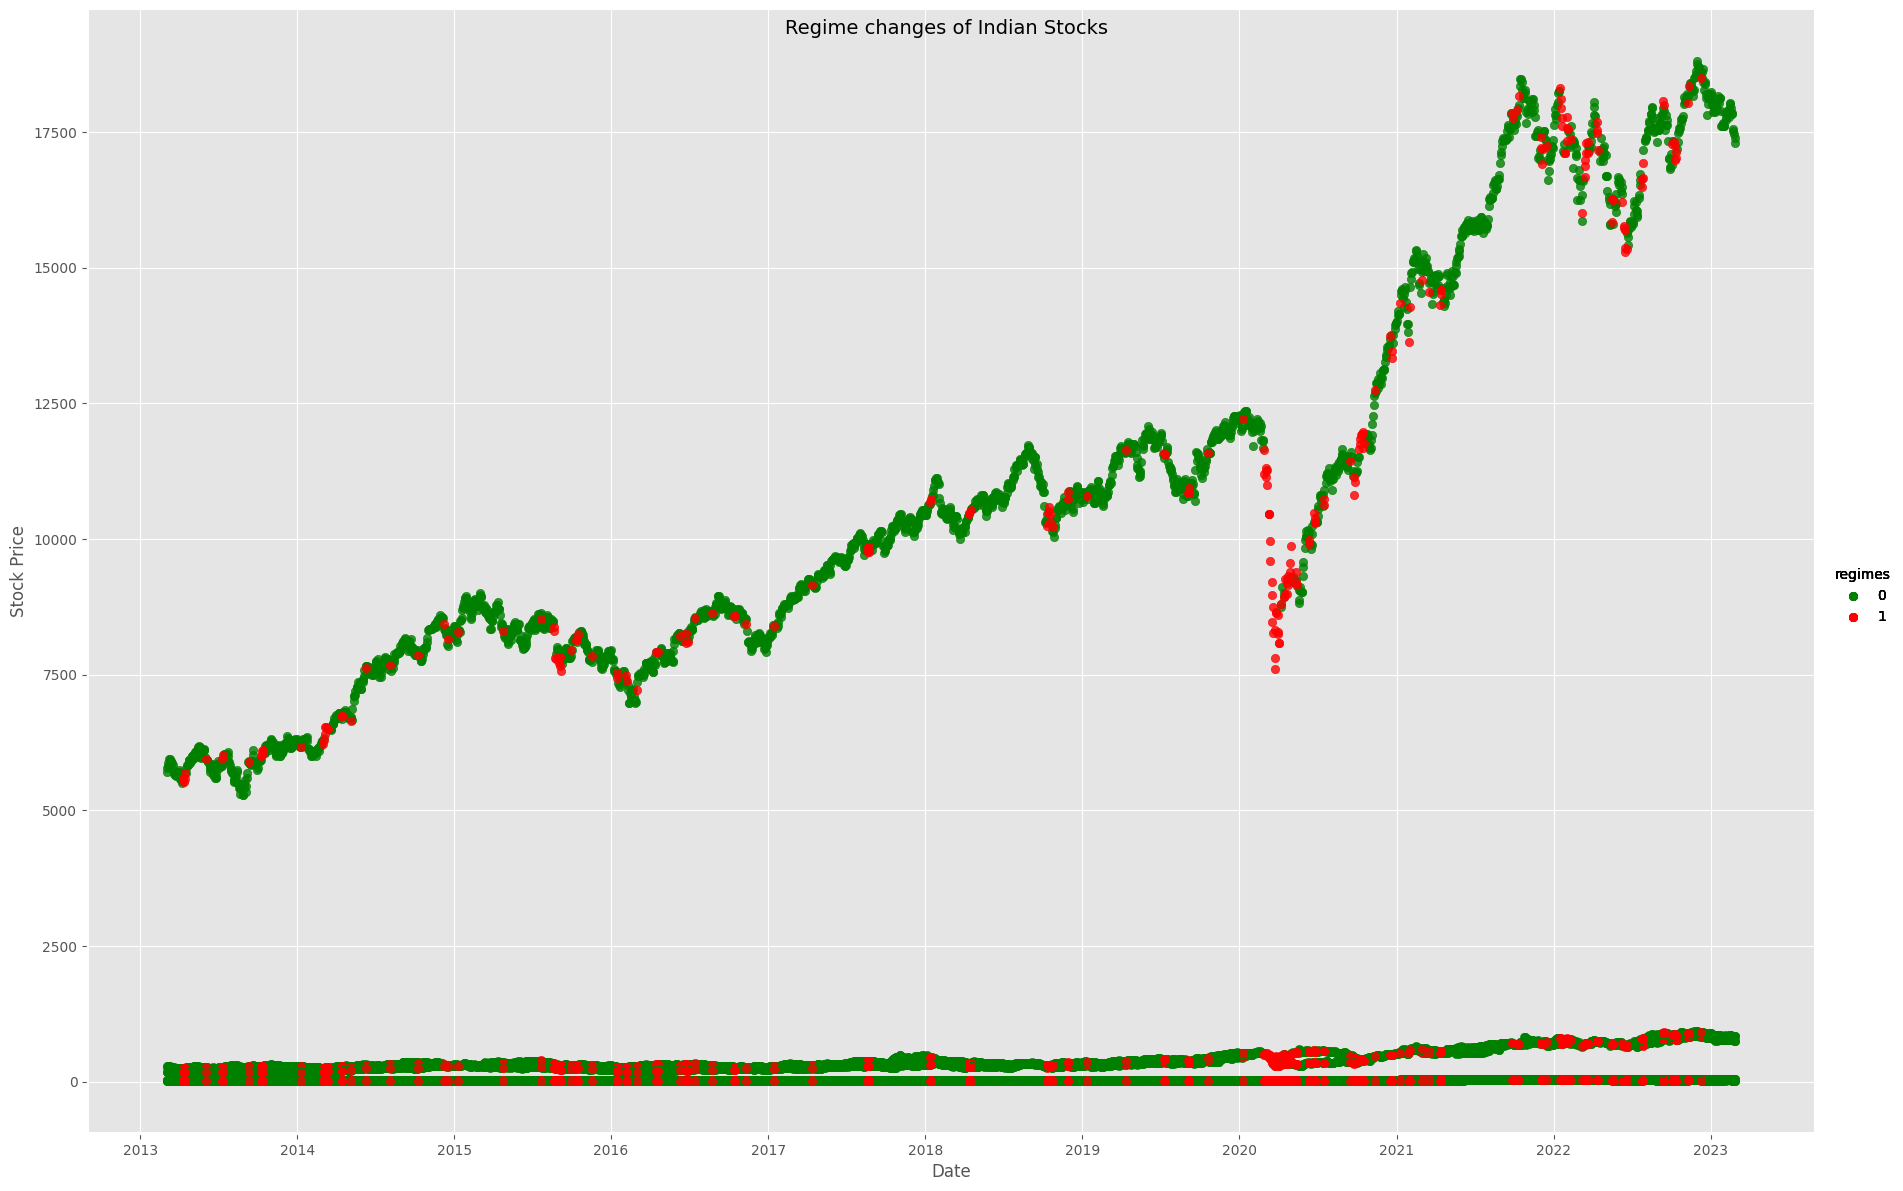

In [ ]:
models = {}
for column in SR_India.columns:
    model = sm.tsa.MarkovRegression(SR_India[column].dropna(),
                                    k_regimes=2, trend='n',
                                    switching_variance=True)
    models[column] = model.fit()

# Display model summaries and plot volatility
for column, model in models.items():
    print(f"Model summary for {column}:")
    print(model.summary())
#Plot regime changes
fig, axes = plt.subplots(2, figsize=(10,7))
ax = axes[0]
ax.plot(model.smoothed_marginal_probabilities[0])
ax.grid(True);
ax.set(title='Smoothed probability low-variance regime returns - Indian Stocks')
ax = axes[1]
ax.plot(model.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability high-variance regime returns - Indian Stocks')
fig.tight_layout()
ax.grid(True);
#We checked regime that Indian stocks have gone through from 2013 to 2023.
low_risk = list(model.smoothed_marginal_probabilities[0])
high_risk = list(model.smoothed_marginal_probabilities[1])

shift = []
for i in range(0, len(low_risk)):
    if low_risk[i] > high_risk[i]:
        shift.append(0)
    else:
        shift.append(1)
reg = pd.DataFrame()
reg['regimes'] = shift

ret = stocks.iloc[len(stocks)-len(shift):]
reg_change = (pd.DataFrame(shift, columns=['regimes'], index=ret.index)
          .join(ret, how='inner')
          .reset_index(drop=False)
          .rename(columns={'index':'Date'}))
reg_change.head()

c = 'green', 'red'
order = [0, 1]
plot = sns.FacetGrid(data=reg_change, hue='regimes', hue_order=order,
                   palette=c, aspect=1.31, height=12)

plot.map(plt.scatter, 'Date', "BHARTIARTL.NS", alpha=0.8).add_legend()
plot.map(plt.scatter, 'Date', "ICICIBANK.NS", alpha=0.8).add_legend()
plot.map(plt.scatter, 'Date', "^NSEI", alpha=0.8).add_legend()
plot.map(plt.scatter, 'Date', "NFTY", alpha=0.8).add_legend()
plot.map(plt.scatter, 'Date', "INFY", alpha=0.8).add_legend()
plt.ylabel("Stock Price")
sns.despine(offset=True)
plot.fig.suptitle('Regime changes of Indian Stocks', fontsize=14, fontweight='normal')
fig.tight_layout()
plt.savefig('tmp.png');

**South African Stocks**

Model summary for ABG.JO:
                        Markov Switching Model Results                        
Dep. Variable:                 ABG.JO   No. Observations:                 2600
Model:               MarkovRegression   Log Likelihood                6639.767
Date:                Mon, 21 Aug 2023   AIC                         -13271.534
Time:                        17:00:42   BIC                         -13248.081
Sample:                             0   HQIC                        -13263.037
                               - 2600                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0003   1.19e-05     21.392      0.000       0.000       0.000
                          

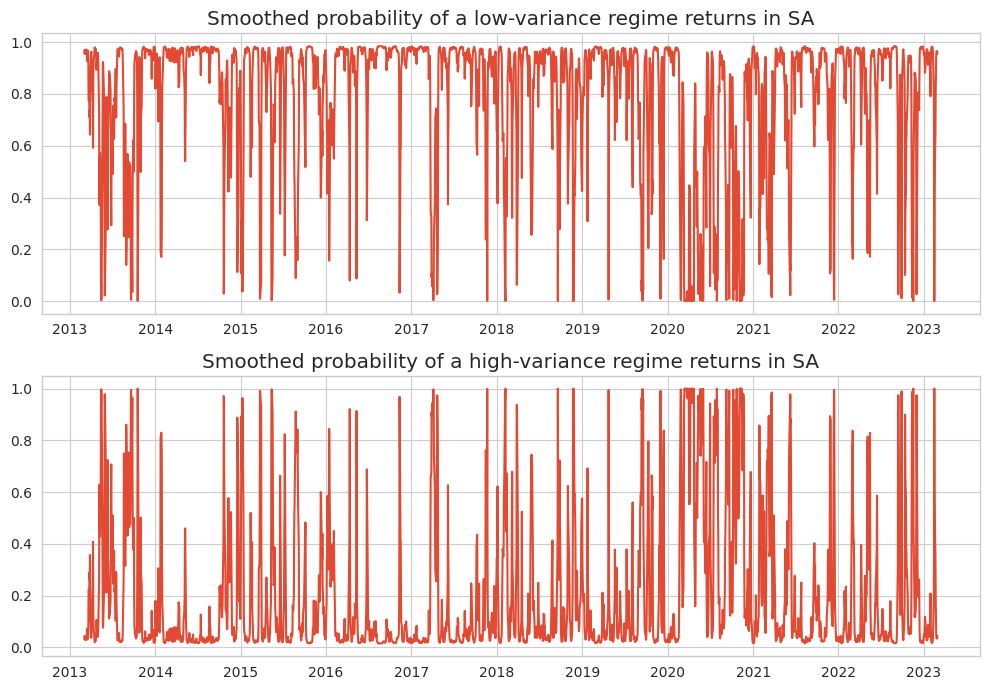

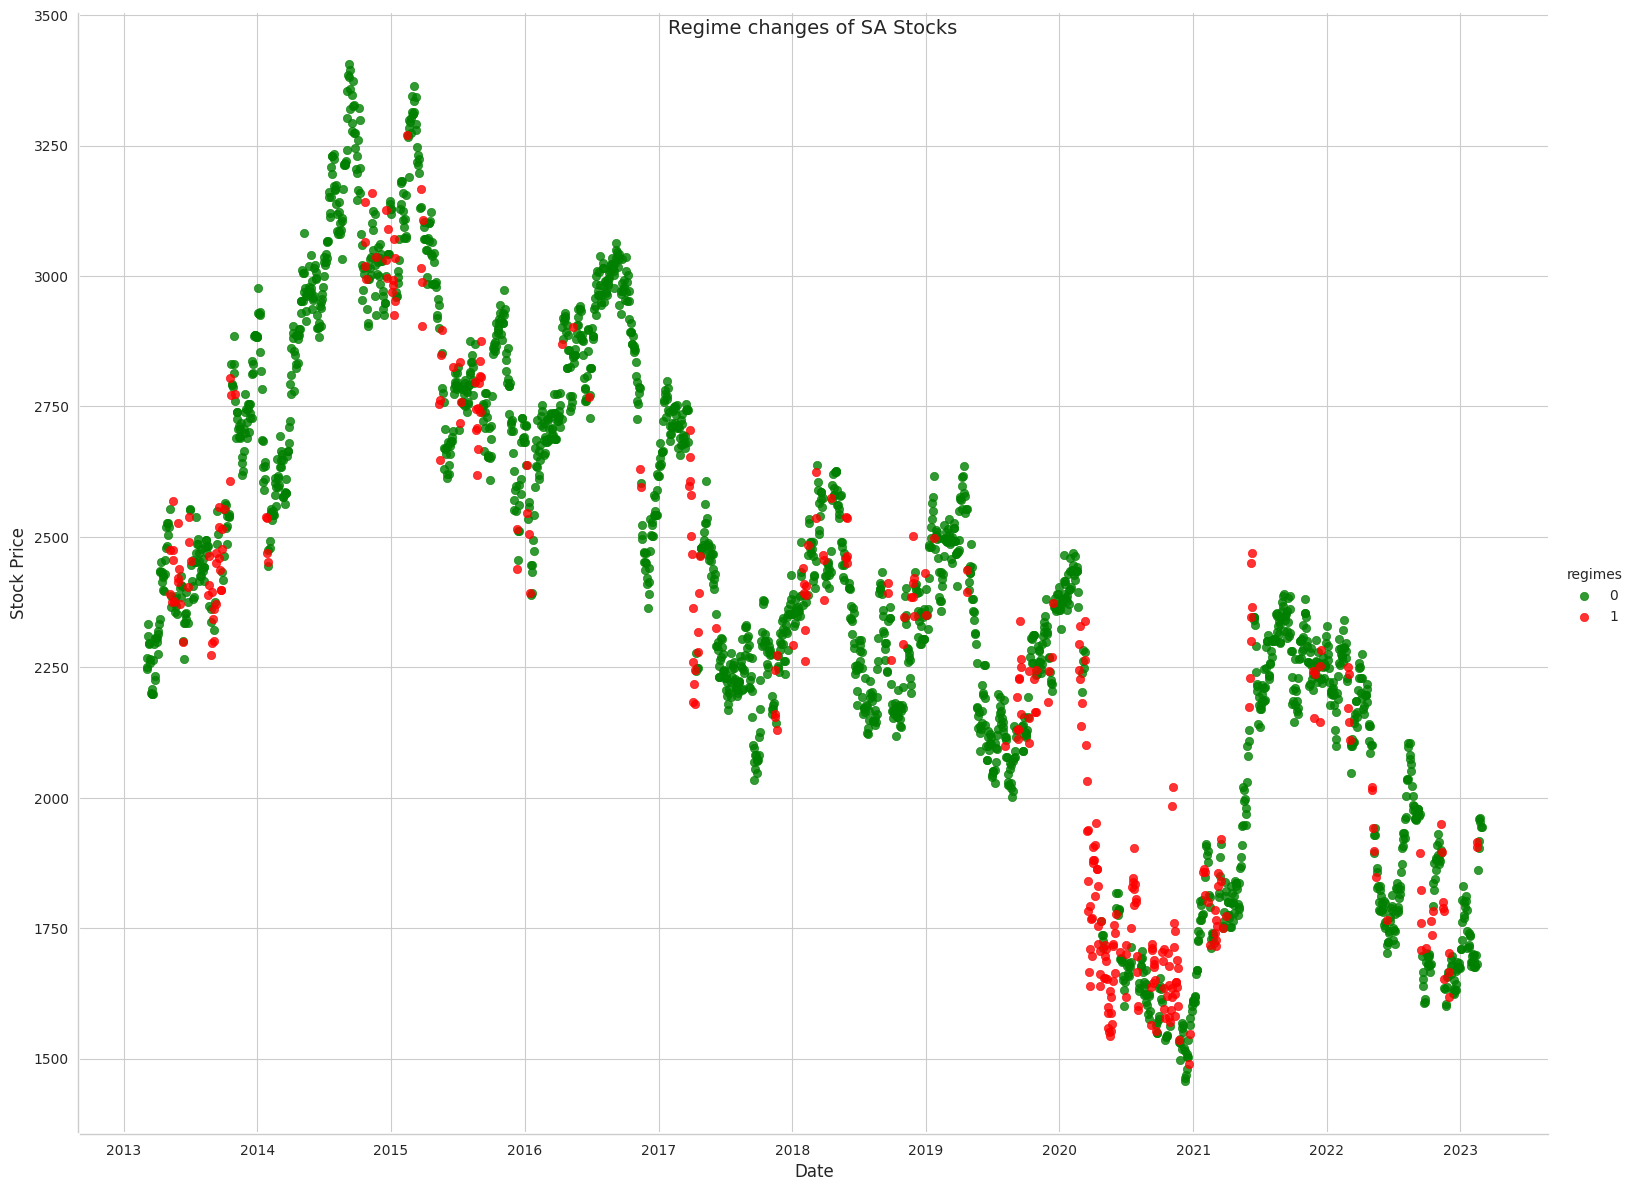

In [ ]:
models = {}
for column in SR_SA.columns:
    model = sm.tsa.MarkovRegression(SR_SA[column],
                                    k_regimes=2, trend='n',
                                    switching_variance=True)
    models[column] = model.fit()

# Display model summaries and plot volatility
for column, model in models.items():
    print(f"Model summary for {column}:")
    print(model.summary())
#Plot regime changes
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, figsize=(10,7))
ax = axes[0]
ax.plot(model.smoothed_marginal_probabilities[0])
ax.grid(True)
ax.set(title='Smoothed probability of a low-variance regime returns in SA')
ax = axes[1]
ax.plot(model.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a high-variance regime returns in SA')
fig.tight_layout()
ax.grid(True);
#We checked regime that SA stocks have gone through from 2013 to 2023.
low_risk = list(model.smoothed_marginal_probabilities[0])
high_risk = list(model.smoothed_marginal_probabilities[1])

shift = []
for i in range(0, len(low_risk)):
    if low_risk[i] > high_risk[i]:
        shift.append(0)
    else:
        shift.append(1)
reg = pd.DataFrame()
reg['regimes'] = shift

ret = stocks.iloc[len(stocks)-len(shift):]
reg_change = (pd.DataFrame(shift, columns=['regimes'], index=ret.index)
          .join(ret, how='inner')
          .reset_index(drop=False)
          .rename(columns={'index':'Date'}))
reg_change.head()

c = 'green', 'red'
order = [0, 1]
plot = sns.FacetGrid(data=reg_change, hue='regimes', hue_order=order,
                   palette=c, aspect=1.31, height=12)

plot.map(plt.scatter, 'Date', column, alpha=0.8).add_legend()
plt.ylabel("Stock Price")
sns.despine(offset=True)
plot.fig.suptitle('Regime changes of SA Stocks', fontsize=14, fontweight='normal')
fig.tight_layout()
plt.savefig('tmp.png');


**Chinese Stocks**

Model summary for VIPS:
                        Markov Switching Model Results                        
Dep. Variable:                   VIPS   No. Observations:                 2600
Model:               MarkovRegression   Log Likelihood                5055.242
Date:                Mon, 21 Aug 2023   AIC                         -10102.483
Time:                        17:00:54   BIC                         -10079.030
Sample:                             0   HQIC                        -10093.986
                               - 2600                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0007    4.6e-05     15.649      0.000       0.001       0.001
                            

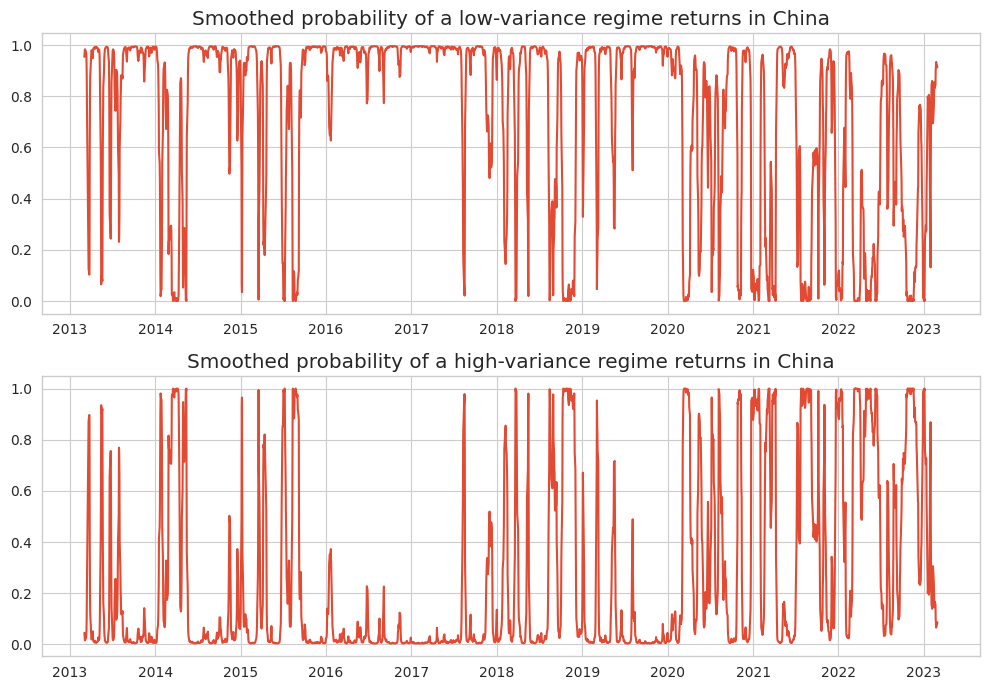

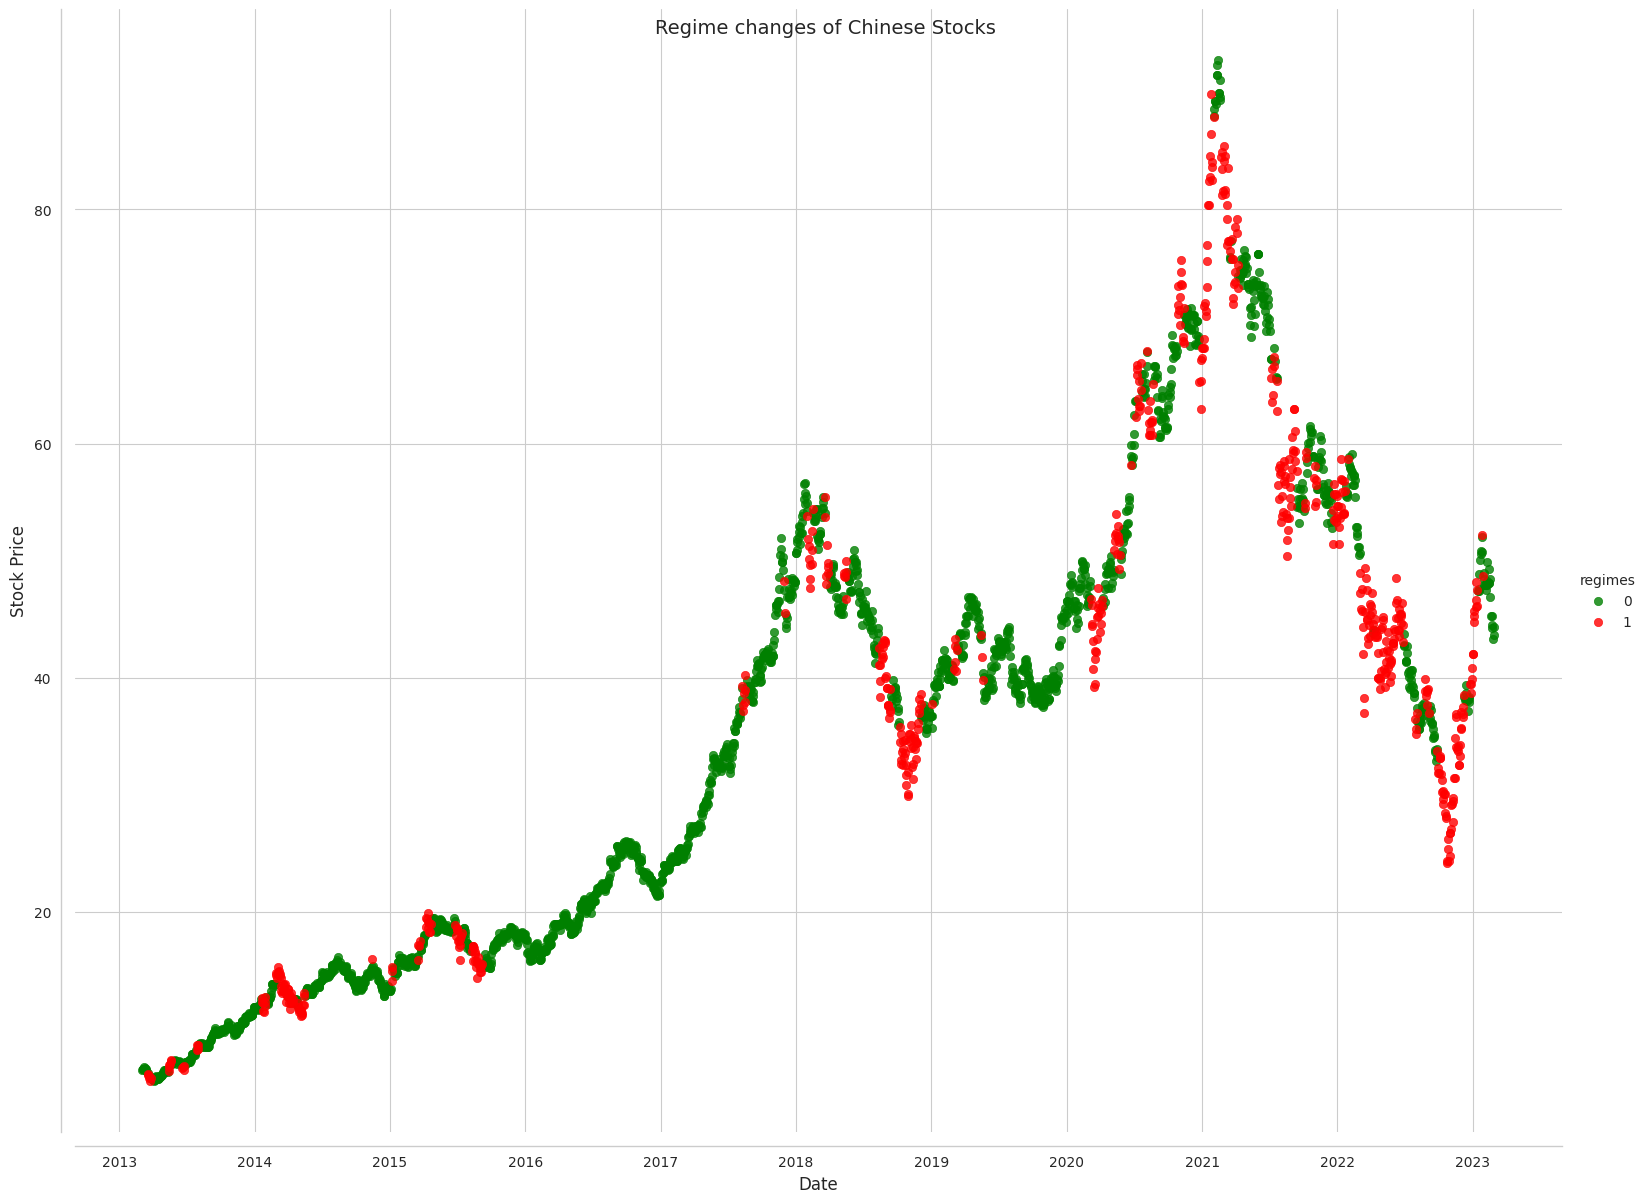

In [ ]:
models = {}
for column in SR_China.columns:
    model = sm.tsa.MarkovRegression(SR_China[column].dropna(),
                                    k_regimes=2, trend='n',
                                    switching_variance=True)
    models[column] = model.fit()

# Display model summaries and plot volatility
for column, model in models.items():
    print(f"Model summary for {column}:")
    print(model.summary())
#Plot regime changes
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, figsize=(10,7))
ax = axes[0]
ax.plot(model.smoothed_marginal_probabilities[0])
ax.grid(True);
ax.set(title='Smoothed probability of a low-variance regime returns in China')
ax = axes[1]
ax.plot(model.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a high-variance regime returns in China')
fig.tight_layout()
ax.grid(True);
#We checked regime that Chinese stocks have gone through from 2013 to 2023.
low_risk = list(model.smoothed_marginal_probabilities[0])
high_risk = list(model.smoothed_marginal_probabilities[1])

shift = []
for i in range(0, len(low_risk)):
    if low_risk[i] > high_risk[i]:
        shift.append(0)
    else:
        shift.append(1)
reg = pd.DataFrame()
reg['regimes'] = shift

ret = stocks.iloc[len(stocks)-len(shift):]
reg_change = (pd.DataFrame(shift, columns=['regimes'], index=ret.index)
          .join(ret, how='inner')
          .reset_index(drop=False)
          .rename(columns={'index':'Date'}))
reg_change.head()

c = 'green', 'red'
order = [0, 1]
plot = sns.FacetGrid(data=reg_change, hue='regimes', hue_order=order,
                   palette=c, aspect=1.31, height=12)
plot.map(plt.scatter, 'Date', column, alpha=0.8).add_legend()
plt.ylabel("Stock Price")
sns.despine(offset=10)
plot.fig.suptitle('Regime changes of Chinese Stocks', fontsize=14, fontweight='normal')
fig.tight_layout()
plt.savefig('tmp.png');

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('na.ipynb')